In [1]:
from importlib import reload

import pandas as pd

from tupuedes.util import exercise_dev
reload(exercise_dev);

In [2]:
import os.path

sources = {}
for csv_file, video_file in exercise_dev.list_recordings():
    sources[csv_file.stem] = (csv_file, video_file)

In [3]:
import ipywidgets as widgets

In [4]:
options = list(sources.keys())
options.sort()

recording_widget = widgets.Select(
    options=options,
    value=options[-1],
    description='Available recordings'
)
recording_widget

Select(description='Available recordings', index=32, options=('2022.08.21 22.25', '2022.08.21 22.28', '2022.08…

In [5]:
import pandas as pd


df = pd.read_csv(sources[recording_widget.value][0], parse_dates=['datetime']).set_index('datetime')

In [76]:
delta = pd.Timedelta(milliseconds=250)
rs_df = df.resample(delta).mean()
rs_df

,Unnamed: 0,fps,absolute_NOSE_x,absolute_NOSE_y,absolute_NOSE_z,absolute_NOSE_visibility,absolute_NOSE_presence,absolute_LEFT_EYE_INNER_x,absolute_LEFT_EYE_INNER_y,absolute_LEFT_EYE_INNER_z,...,eq_bar_center_x,eq_bar_center_y,eq_bar_top_left_x,eq_bar_top_left_y,eq_bar_top_right_x,eq_bar_top_right_y,eq_bar_bottom_right_x,eq_bar_bottom_right_y,eq_bar_bottom_left_x,eq_bar_bottom_left_y
datetime,,,,,,,,,,,,,,,,,,,,,
2022-08-23 17:23:34.250,0.0,0.000000,0.528425,0.302985,-0.182683,0.987243,0.0,0.531152,0.289104,-0.207623,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-23 17:23:34.500,0.0,4.406488,0.549228,0.306528,-0.217296,0.988069,0.0,0.552462,0.293724,-0.246920,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-23 17:23:34.750,0.0,7.617843,0.579114,0.294434,-0.116311,0.991140,0.0,0.584045,0.281595,-0.137512,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-23 17:23:35.000,0.0,7.919434,0.589262,0.280193,-0.120254,0.993109,0.0,0.596205,0.268212,-0.138987,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-23 17:23:35.250,0.0,16.498959,0.590828,0.280129,-0.134275,0.994855,0.0,0.599137,0.267266,-0.150988,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-23 17:29:39.750,0.0,12.281032,0.455375,0.408665,-0.334092,0.994108,0.0,0.461145,0.394106,-0.327521,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-23 17:29:40.000,0.0,14.615174,0.507297,0.414181,-0.235535,0.984486,0.0,0.511609,0.397616,-0.215712,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-08-23 17:29:40.250,0.0,12.224599,0.517403,0.422386,-0.399004,0.988042,0.0,0.522782,0.402245,-0.380029,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='datetime'>

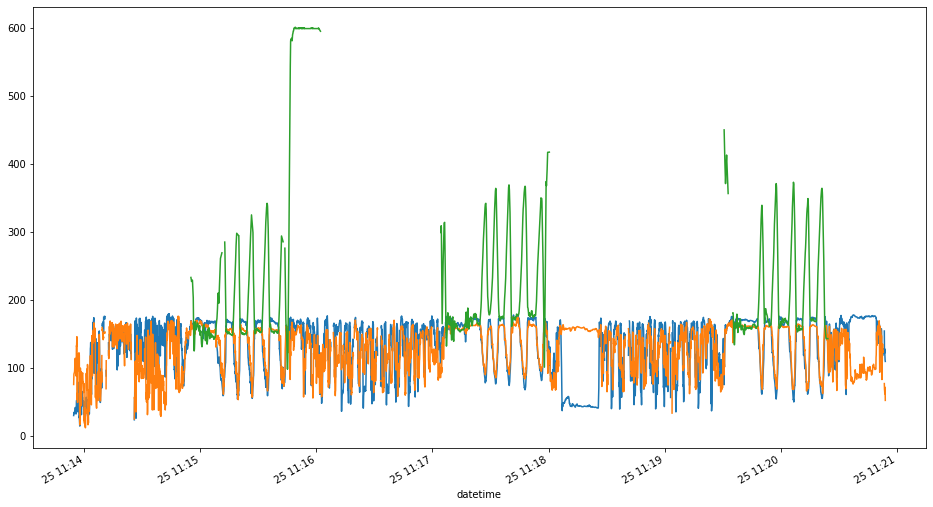

In [6]:


df.angle_RIGHT_KNEE.plot(figsize=(16,9))
df.angle_LEFT_KNEE.plot()
#df.relative_RIGHT_ANKLE_y.plot()
df.eq_bar_center_y.interpolate(limit=10).plot()

<AxesSubplot:xlabel='datetime'>

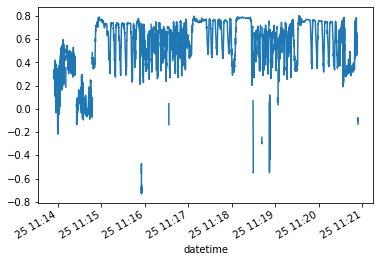

In [16]:
(df.angle_RIGHT_KNEE

<AxesSubplot:xlabel='datetime'>

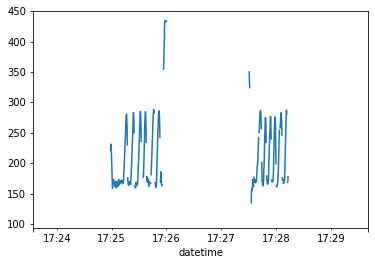

In [79]:
rs_df.eq_bar_center_y.plot()
#rs_df.right